# Autograding `matplotlib` plots with `matplotcheck` and `otter`

In [ ]:
! pip install pandas --q
! pip install matplotlib --q
! pip install otter-grader --q
! pip install matplotcheck -- q

In [5]:
import matplotlib.pyplot as plt
import matplotcheck.base as mpc
import matplotcheck.notebook as nb
import pandas as pd

In [9]:
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Quick Intro to `matplotcheck`

We'll start by looking at a quick example using the `tips` data set. We will create a simple `matplotlib` plot and use it to explore `matplotcheck`.

In [27]:
example_df=tips["sex"].value_counts().to_frame().reset_index()
example_df.head()

,sex,count
0,Male,157
1,Female,87


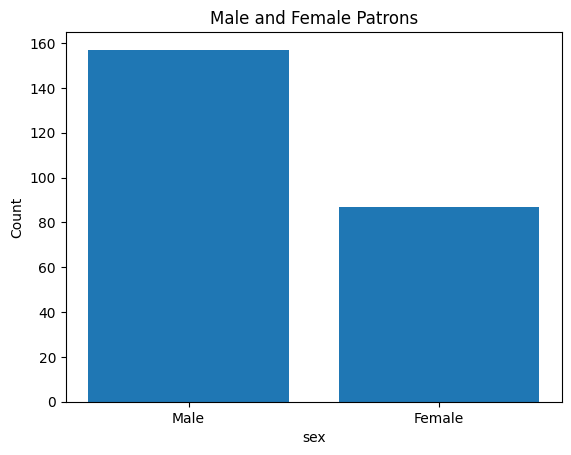

In [28]:
plt.bar(example_df["sex"], example_df["count"])
plt.title("Male and Female Patrons")
plt.xlabel("sex")
plt.ylabel("Count")
plt.show()

Pretty simple. Now let's take a look at `matplotcheck`.


By adding in the following line:

```python
plot_1_hold = nb.convert_axes(plt, which_axes="current") 
```
*Note that `plot_1_hold` is just a variable and can be replaced with any other name.*

`matplotcheck` "saves" a copy of the plot so it can be autograded. *Make sure this is before the call to `plt.show()`*

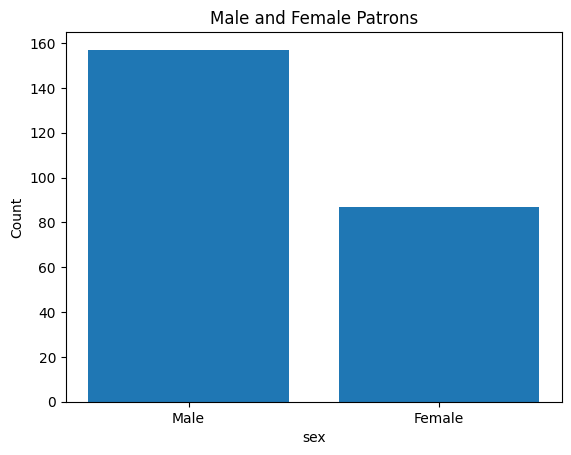

In [33]:
plt.bar(example_df["sex"], example_df["count"])
plt.title("Male and Female Patrons")
plt.xlabel("sex")
plt.ylabel("Count")

plot_1_hold = nb.convert_axes(plt, which_axes="current")
plt.show()

We can now begin to test the plot above. We start by creating a `PlotTester` object using our saved plot.

In [34]:
plot_tester_1 = mpc.PlotTester(plot_1_hold)

`matplotcheck` allows for many different types of tests to be run. For example, we can test whether the plot is of the correct type. We can do this by using the `assert_plot_type` method. Currently, only bar, line, and scatter plots work.

In [35]:
plot_tester_1.assert_plot_type("bar")

We can see that by not getting an error, this plot is of the correct type. Let's see what would happen if the plot type was incorrect.

In [36]:
plot_tester_1.assert_plot_type("line")

AssertionError: Plot is not of type line

Other features of `matplotcheck` include:
 * Checking title
 * Checking axis labels
 
Because the workflow of these is similar, we'll combine them.

In [37]:
plot_tester_1.assert_title_contains(["Male", "and", "Female", "Patrons"])
plot_tester_1.assert_axis_label_contains(axis="x", strings_expected=["sex"])
plot_tester_1.assert_axis_label_contains(axis="y", strings_expected=["Count"])

The tests are not case sensitive.

In [41]:
plot_tester_1.assert_axis_label_contains(axis="x", strings_expected=["SEX"])

The title does not need to contain all of the expected string but will flag if the title does not contain the expected words.

In [48]:
plot_tester_1.assert_title_contains(strings_expected="pineapple")

AssertionError: Title does not contain expected string: pineapple

There is also an option to check that the data in the plot is correct.

In [53]:
expected_data = pd.DataFrame(
    {"sex": ["Male", "Female"], "count": [157,87]}
)

plot_tester_1.assert_xydata(
    expected_data, xcol="sex", ycol="count", xlabels=True
)

## `matplotcheck` and `otter`

The workflow with `otter` will look something like this:

```raw
# BEGIN QUESTION
name: q2.4
```


Note that this *does not* have the 

```raw
manual: true
```

tag in the question config.

**Question 2.4:** Plot a bar chart of Male and Female patrons. 

Your plot should have:
 * An x-axis labeled as `sex`
 * A y-axis labeled as `Count`
 * A title `Male and Female Patrons`

```raw
# BEGIN SOLUTION
```

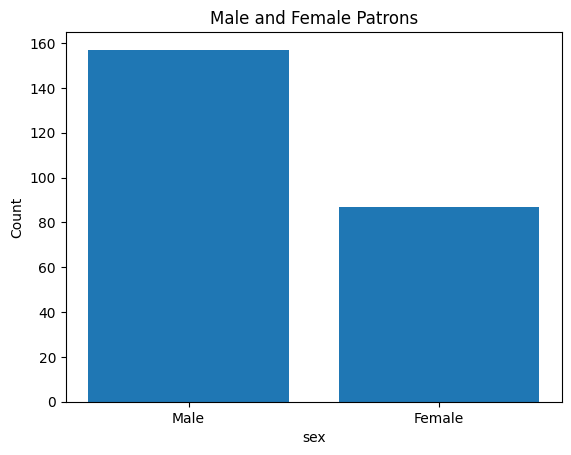

In [54]:
# BEGIN SOLUTION
plt.bar(example_df["sex"], example_df["count"])
plt.title("Male and Female Patrons")
plt.xlabel("sex")
plt.ylabel("Count")

# END SOLUTION
plot_1_hold = nb.convert_axes(plt, which_axes="current")
plt.show()

```raw
# END SOLUTION
```

```raw
# BEGIN TESTS
```

In [55]:
plot_tester_1 = mpc.PlotTester(plot_1_hold)
plot_tester_1.assert_plot_type("bar")
plot_tester_1.assert_title_contains(["Male", "and", "Female", "Patrons"])
plot_tester_1.assert_axis_label_contains(axis="x", strings_expected=["sex"])
plot_tester_1.assert_axis_label_contains(axis="y", strings_expected=["Count"])
expected_data = pd.DataFrame(
    {"sex": ["Male", "Female"], "count": [157,87]}
)

plot_tester_1.assert_xydata(
    expected_data, xcol="sex", ycol="count", xlabels=True
)

```raw
# END TESTS
```

```raw
# END QUESTION
```

That's pretty much it. 

Notes:
* `matplotcheck` has been tested to work on the student facing notebook autograder but has not been tested on the Gradescope side. 